# COVID Global Forecast Task Notebook

#### Setup

In [ ]:
!pip install lightgbm
!pip install xgboost
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ML libraries
import lightgbm as lgb
import xgboost as xgb

from xgboost import plot_importance, plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

test = pd.read_csv("input/test.csv")
train = pd.read_csv("input/train.csv")

pop_italy = 60486683.
pop_spain = 46749696.
pop_UK = 67784927.
pop_US = 331002651.


### The tendency excluding China 

In [ ]:
confirmed_total_date_noChina = train[train['Country/Region']!='China'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_noChina = train[train['Country/Region']!='China'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_noChina = confirmed_total_date_noChina.join(fatalities_total_date_noChina)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

total_date_noChina.plot(ax=ax1)
ax1.set_title("Global confirmed cases excluding China", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)

fatalities_total_date_noChina.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases excluding China", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

### The tendency in China 

In [ ]:
confirmed_total_date_China = train[train['Country/Region']=='China'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_China = train[train['Country/Region']=='China'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_China = confirmed_total_date_China.join(fatalities_total_date_China)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
total_date_China.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)

fatalities_total_date_China.plot(ax=ax2, color='orange')
ax2.set_title("Deceased cases in China", size=13)
ax2.set_ylabel("Number of cases in China", size=13)
ax2.set_xlabel("Date", size=13)

### Try to plot the tendency of Italy, Spain, UK and US


Hint: Extract the data from the training set, group by the data by the date.
      Plot the tendency of confrimedcases and fatalities. 

Text(0, 0.5, 'Confirmed infection cases')

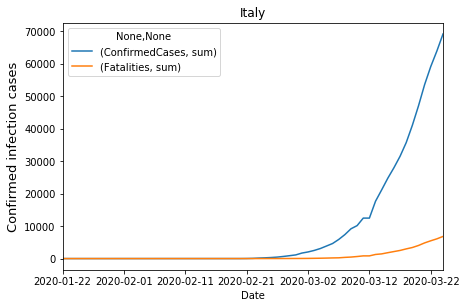

In [2]:

# Extract the confrimed and fatalities data from training set
confirmed_total_date_Italy = train[train['Country/Region']=='Italy'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Italy = train[train['Country/Region']=='Italy'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

# plot the tendency of Italy
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)




## Try to plot the tendency of Spain
You can take the Italy example as the reference

In [ ]:
# Extract the confrimed and fatalities data from training set
# Using the Country/Region == "Spain" to retrieve data

#
#
#



# Plot the tendency

#
#
#




# Data Preprocessing

### 1. Join data, filter dates and clean missings(Data Preprocessing) 

First of all, we perform some pre-processing prepare the dataset, consisting on:
Join data. Join train/test to facilitate data transformations

Filter dates. According to the challenge conditions, remove ConfirmedCases and Fatalities post 2020-03-12.

Create additional date columns

Missings. Analyze and fix missing values

In [3]:
# Merge train and test, exclude overlap
dates_overlap = ['2020-03-12','2020-03-13','2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18',
                 '2020-03-19','2020-03-20','2020-03-21','2020-03-22','2020-03-23', '2020-03-24']
train2 = train.loc[~train['Date'].isin(dates_overlap)]
all_data = pd.concat([train2, test], axis = 0, sort=False)


# Double check that there are no informed ConfirmedCases and Fatalities after 2020-03-11
all_data.loc[all_data['Date'] >= '2020-03-12', 'ConfirmedCases'] = np.nan
all_data.loc[all_data['Date'] >= '2020-03-12', 'Fatalities'] = np.nan


# Create date columns
all_data['Date'] = pd.to_datetime(all_data['Date'])
le = preprocessing.LabelEncoder()
all_data['Day_num'] = le.fit_transform(all_data.Date)

all_data['Day'] = all_data['Date'].dt.day
all_data['Month'] = all_data['Date'].dt.month
all_data['Year'] = all_data['Date'].dt.year

# Fill null values given that we merged train-test datasets
all_data['Province/State'].fillna("None", inplace=True)
all_data['ConfirmedCases'].fillna(0, inplace=True)
all_data['Fatalities'].fillna(0, inplace=True)
all_data['Id'].fillna(-1, inplace=True)
all_data['ForecastId'].fillna(-1, inplace=True)

# Aruba has no Lat nor Long. Inform it manually
all_data.loc[all_data['Lat'].isna()==True, 'Lat'] = 12.510052
all_data.loc[all_data['Long'].isna()==True, 'Long'] = -70.009354


### 2. Compute lags and trends
Enriching a dataset is key to obtain good results. In this case we will apply 2 different transformations:

##### Lag. 
Lags are a way to compute the previous value of a column, so that the lag 1 for ConfirmedCases would inform the this column from the previous day. The lag 3 of a feature X is simply:$$X_{lag3}(t) = X(t-3)$$

##### Trend. 
Transformig a column into its trend gives the natural tendency of this column, which is different from the raw value. The definition of trend I will apply is:$$Trend_{X} = {X(t) - X(t-1) \over X(t-1)}$$

In [4]:
def calculate_trend(df, lag_list, column):
    for lag in lag_list:
        trend_column_lag = "Trend_" + column + "_" + str(lag)
        
        # calculate the trend by column 
        # take the formula as the reference 
        df[trend_column_lag] = 
        
        
    return df



In [ ]:
def calculate_lag(df, lag_list, column):
    for lag in lag_list:
        column_lag = column + "_" + str(lag)
        
        # calculate the lag by column        
        df[column_lag] = 
        
    return df

### The backlog of lags we'll apply is 14 days, while for trends is 7 days. 
##### For ConfirmedCases and Fatalities:

In [1]:

ts = time.time()

# for confirmed cases 
all_data = calculate_lag(all_data, range(1,7), 'ConfirmedCases')
all_data = calculate_trend(all_data, range(1,7), 'ConfirmedCases')

NameError: name 'time' is not defined

In [ ]:
# for Fatalities 



In [ ]:
all_data.replace([np.inf, -np.inf], 0, inplace=True)
all_data.fillna(0, inplace=True)

# Observations:

    "ConfirmedCases" and "Fatalities" are now only informed for dates previous to 2020-03-12
    The dataset includes all countries and dates, which is required for the lag/trend step
    Missing values for "ConfirmedCases" and "Fatalities" have been replaced by 0, which may be dangerous if we do not remember it at the end of the process. 
    However, since we will train only on dates previous to 2020-03-12, this won't impact our prediction algorithm
    A new column "Day" has been created, as a day counter starting from the first date

### 3. Add country details 
Variables like the total population of a country, the average age of citizens or the fraction of peoople living in cities may strongly impact on the COVID-19 transmission behavior. Hence, it's important to consider these factors. I'm using Tanu's dataset based on Web Scrapping for this purpose.

In [6]:
# Load countries data file
world_population = pd.read_csv("input/population_by_country_2020.csv")

# Select desired columns and rename some of them
world_population = world_population[['Country (or dependency)', 'Population (2020)', 'Density (P/Km²)', 'Land Area (Km²)', 'Med. Age', 'Urban Pop %']]
world_population.columns = ['Country (or dependency)', 'Population (2020)', 'Density', 'Land Area', 'Med Age', 'Urban Pop']

# Replace United States by US
world_population.loc[world_population['Country (or dependency)']=='United States', 'Country (or dependency)'] = 'US'

# Remove the % character from Urban Pop values
world_population['Urban Pop'] = world_population['Urban Pop'].str.rstrip('%')

# Replace Urban Pop and Med Age "N.A" by their respective modes, then transform to int
world_population.loc[world_population['Urban Pop']=='N.A.', 'Urban Pop'] = int(world_population.loc[world_population['Urban Pop']!='N.A.', 'Urban Pop'].mode()[0])
world_population['Urban Pop'] = world_population['Urban Pop'].astype('int16')
world_population.loc[world_population['Med Age']=='N.A.', 'Med Age'] = int(world_population.loc[world_population['Med Age']!='N.A.', 'Med Age'].mode()[0])
world_population['Med Age'] = world_population['Med Age'].astype('int16')



# Now join the dataset to our previous DataFrame and clean missings (not match in left join)- label encode cities
all_data = all_data.merge(world_population, left_on='Country/Region', right_on='Country (or dependency)', how='left')
all_data[['Population (2020)', 'Density', 'Land Area', 'Med Age', 'Urban Pop']] = all_data[['Population (2020)', 'Density', 'Land Area', 'Med Age', 'Urban Pop']].fillna(0)


# Label encode countries and provinces. Save dictionary for exploration purposes
all_data.drop('Country (or dependency)', inplace=True, axis=1)

all_data['Country/Region'] = le.fit_transform(all_data['Country/Region'])
number_c = all_data['Country/Region']
countries = le.inverse_transform(all_data['Country/Region'])
country_dict = dict(zip(countries, number_c)) 


all_data['Province/State'] = le.fit_transform(all_data['Province/State'])
number_p = all_data['Province/State']
province = le.inverse_transform(all_data['Province/State'])
province_dict = dict(zip(province, number_p))

## Linear Regression for one country 
Since we are interested into predicting the future time evolution of the pandemic, our first approach consists on a simple Linear Regression. However, remind that the evolution is not linear but exponential (only in the beginning of the infection), so that a preliminar log transformation is needed.

Visual comparison of both cases for Spain and with data from last 10 days informed, starting on March 1st:

As you see, the log transformation results in a fancy straight-like line, which is awesome for Linear Regression. However, let me clarify two important points:

This "roughly exponential behavior" is only true for the initial infection stages of the pandemic (the initial increasing of infections on the SIR model), but that's exactly the point where most countries are at the moment.

Why do I only extract the last 10 days of data? For three reasons:

In order to capture exactly the very short term component of the evolution
To prevent the effects of certain variables that have been impacting the transmition speed (quarantine vs free circulation)
To prevent differences on criteria when confirming cases (remember that weird slope on the China plot?)
This first model is very simple, and only elemental features will be considered: Country/Region, date information, Long and Lat. Lags. Engineered columns like lags, trends and country details are not introduced as an input. Finally, the workflow for the Basic Linear Regression model is:

##### 1.Features. Select features

##### 2.Dates. Filter train data from 2020-03-01 to 2020-03-11

##### 3.Log transformation. Apply log transformation to ConfirmedCases and Fatalities
Infinites. Replace infinites from the logarithm with 0. Given the asymptotic behavior of the logarithm for log(0),this implies that when applying the inverse transformation (exponential) a 1 will be returned instead of a 0. This problem does not impact many countries, but still needs to be tackled sooner or later in order to obtain a clean solution.

##### 4.Train/test split. Split into train/valid/test

##### 5.Prediction. Linear Regression, training country by country and joining data

##### 6.Submit. Submit results in the correct format, and applying exponential to reverse log transformation

In [7]:
# Filter selected features
data = all_data.copy()
features = ['Id', 'ForecastId', 'Country/Region', 'Province/State', 'ConfirmedCases', 'Fatalities', 
       'Day_num', 'Day', 'Month', 'Year', 'Long', 'Lat']
data = data[features]

# Apply log transformation to all ConfirmedCases and Fatalities columns, except for trends
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].astype('float64')
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].apply(lambda x: np.log(x))

# Replace infinites
data.replace([np.inf, -np.inf], 0, inplace=True)

### Try to complete the split_data function below

In [ ]:

# Split data into train/test
def split_data(data):
    
    # Train set
    x_train = data[data.ForecastId == -1].drop(['ConfirmedCases', 'Fatalities'], axis=1)
    
    # Train set for confirmed Cases 
    y_train_1 = 
    y_train_2 = 

    # Test set
    # Hint: the forecastID should be different from the training set
    x_test = 

    
    # Clean Id columns and keep ForecastId as index
    x_train.drop('Id', inplace=True, errors='ignore', axis=1)
    x_train.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    
    # copy the same operation to test data

    #
    #
    
    return x_train, y_train_1, y_train_2, x_test



### Try to complete the linear regression function below

In [ ]:
# Linear regression model
def lin_reg(X_train, Y_train, X_test):
    
    # Create linear regression object
    
    # regr =

    # Train the model using the training sets
    # Hint: fit function 
    
    # regr.

    
    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
    
    return regr, y_pred

In [ ]:

# Submission function
def get_submission(df, target1, target2):
    
    prediction_1 = df[target1]
    prediction_2 = df[target2]

    # Submit predictions
    prediction_1 = [int(item) for item in list(map(round, prediction_1))]
    prediction_2 = [int(item) for item in list(map(round, prediction_2))]
    
    submission = pd.DataFrame({
        "ForecastId": df['ForecastId'].astype('int32'), 
        "ConfirmedCases": prediction_1, 
        "Fatalities": prediction_2
    })
    submission.to_csv('submission.csv', index=False)

Text(0.5, 0.98, 'ConfirmedCases predictions based on Linear Regression for Italy')

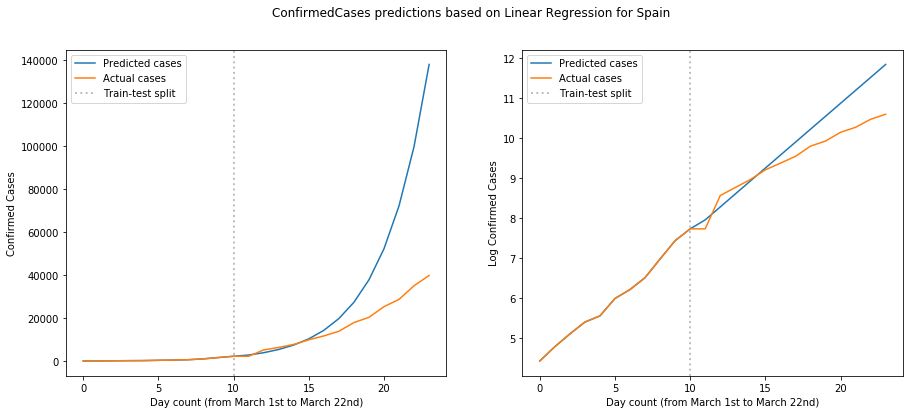

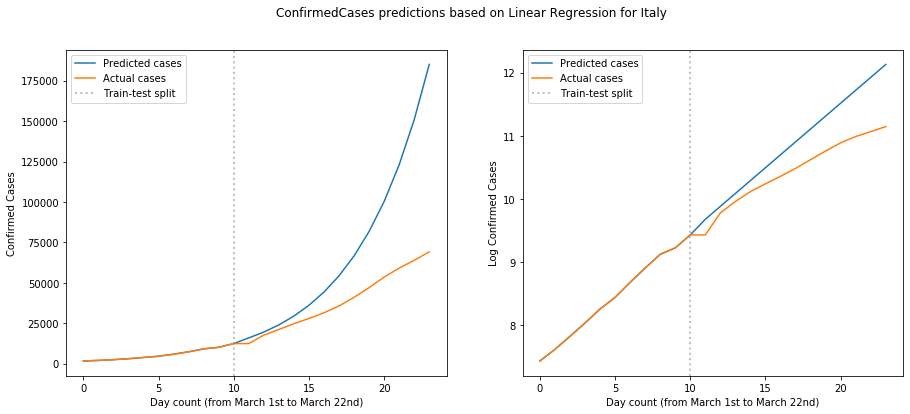

In [8]:

# Select train (real) data from March 1 to March 22nd
dates_list = ['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', 
                 '2020-03-10', '2020-03-11','2020-03-12','2020-03-13','2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18',
                 '2020-03-19','2020-03-20','2020-03-21','2020-03-22','2020-03-23', '2020-03-24']

# Filter Spain, run the Linear Regression workflow
# You can also substitue the country to any countries in the dataset 
country_name = "Spain"
day_start = 39
data_country = data[data['Country/Region']==country_dict[country_name]]
data_country = data_country.loc[data_country['Day_num']>=day_start]


# Split the country data into training and test data
# Hint: Use the split function

# X_train, Y_train_1, Y_train_2, X_test = 
 


# Apply the linear regression function

# model, pred = 



In [ ]:
# Create a df with both real cases and predictions (predictions starting on March 12th)
X_train_check = X_train.copy()
X_train_check['Target'] = Y_train_1

X_test_check = X_test.copy()
X_test_check['Target'] = pred

X_final_check = pd.concat([X_train_check, X_test_check])

# Select predictions from March 1st to March 24th
predicted_data = X_final_check.loc[(X_final_check['Day_num'].isin(list(range(day_start, day_start+len(dates_list)))))].Target
real_data = train.loc[(train['Country/Region']==country_name) & (train['Date'].isin(dates_list))]['ConfirmedCases']
dates_list_num = list(range(0,len(dates_list)))

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# Comfirmed Cases
ax1.plot(dates_list_num, np.exp(predicted_data))
ax1.plot(dates_list_num, real_data)
ax1.axvline(10, linewidth=2, ls = ':', color='grey', alpha=0.5)
ax1.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
ax1.set_xlabel("Day count (from March 1st to March 22nd)")
ax1.set_ylabel("Confirmed Cases")

# Log Confirmed Cases
ax2.plot(dates_list_num, predicted_data)
ax2.plot(dates_list_num, np.log(real_data))
ax2.axvline(10, linewidth=2, ls = ':', color='grey', alpha=0.5)
ax2.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
ax2.set_xlabel("Day count (from March 1st to March 22nd)")
ax2.set_ylabel("Log Confirmed Cases")

plt.suptitle(("ConfirmedCases predictions based on Linear Regression for "+country_name))


# Linear regression with lags 
    
   With all the previous results in mind, I quite believe that Linear Regression is a good approach for the early stages of the COVID-19 spread. Of course, this is only true for the initial outbreak we are analysing, and there's no way our model could predict when the number of new infections is going to decrease. But for short-term prediction purposes everything is fine, and we are in disposition to try to improve the results.

   Remember those lagged variables we computed some sections before? Now it's time to use them, but first there's a problem to solve. If we use our dataset to predict the next following days of contagions, for the first day all the lags will be reported (from the previous days), but what about the next days? Many of the lags will be unknown (flagged as 0), since the number of ConfirmedCases is only known for the train subset. The most simple approach to overcome this is:

   ###### 1. Begin with the train dataset, with all cases and lags reported 

   ###### 2. Forecast only the following day, through the Linear Regression

   ###### 3. Set the new prediction as a confirmed case

   ###### 4. Recompute lags

   ###### 5. Repeat from step 2 to step 4 for all remaining days

   As usual, I'll start training on single countries in order to analyze the behavior of the model with these new features.

In [9]:
# New split function, for one forecast day
def split_data_one_day(data, d):
    
    # Train
    x_train = data[data.Day_num<d]
    y_train_1 = x_train.ConfirmedCases
    y_train_2 = x_train.Fatalities
    x_train.drop(['ConfirmedCases', 'Fatalities'], axis=1, inplace=True)
    
    # Test
    x_test = data[data.Day_num==d]
    x_test.drop(['ConfirmedCases', 'Fatalities'], axis=1, inplace=True)
    
    # Clean Id columns and keep ForecastId as index
    x_train.drop('Id', inplace=True, errors='ignore', axis=1)
    x_train.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    x_test.drop('Id', inplace=True, errors='ignore', axis=1)
    x_test.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    
    return x_train, y_train_1, y_train_2, x_test


def plot_real_vs_prediction_country(data, train, country_name, day_start, dates_list):

    # Select predictions from March 1st to March 24th
    predicted_data = data.loc[(data['Day_num'].isin(list(range(day_start, day_start+len(dates_list)))))].ConfirmedCases
    real_data = train.loc[(train['Country/Region']==country_name) & (train['Date'].isin(dates_list))]['ConfirmedCases']
    dates_list_num = list(range(0,len(dates_list)))

    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

    ax1.plot(dates_list_num, np.exp(predicted_data))
    ax1.plot(dates_list_num, real_data)
    ax1.axvline(10, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax1.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax1.set_xlabel("Day count (starting on March 1st)")
    ax1.set_ylabel("Confirmed Cases")

    ax2.plot(dates_list_num, predicted_data)
    ax2.plot(dates_list_num, np.log(real_data))
    ax2.axvline(10, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax2.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax2.set_xlabel("Day count (starting on March 1st)")
    ax2.set_ylabel("Log Confirmed Cases")

    plt.suptitle(("ConfirmedCases predictions based on Linear Regression for "+country_name))
    
    
def plot_real_vs_prediction_country_fatalities(data, train, country_name, day_start, dates_list):

    # Select predictions from March 1st to March 24th
    predicted_data = data.loc[(data['Day_num'].isin(list(range(day_start, day_start+len(dates_list)))))].Fatalities
    real_data = train.loc[(train['Country/Region']==country_name) & (train['Date'].isin(dates_list))]['Fatalities']
    dates_list_num = list(range(0,len(dates_list)))

    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

    ax1.plot(dates_list_num, np.exp(predicted_data))
    ax1.plot(dates_list_num, real_data)
    ax1.axvline(10, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax1.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax1.set_xlabel("Day count (starting on March 1st)")
    ax1.set_ylabel("Fatalities Cases")

    ax2.plot(dates_list_num, predicted_data)
    ax2.plot(dates_list_num, np.log(real_data))
    ax2.axvline(10, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax2.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax2.set_xlabel("Day count (starting on March 1st)")
    ax2.set_ylabel("Log Fatalities Cases")

    plt.suptitle(("Fatalities predictions based on Linear Regression for "+country_name))
    
     
    
# Function to compute the Linear Regression predictions with lags, for a certain Country/Region
def lin_reg_with_lags_country(all_data, country_name, day_start, lag_size, country_dict):
    
    ts = time.time()
    
    # Filter country and features from all_data (dataset without data leaking)
    data = all_data.copy()
    features = ['Id', 'Province/State', 'Country/Region', 'Lat', 'Long', 
           'ConfirmedCases', 'Fatalities', 'ForecastId', 'Day_num']
    data = data[features]

    # Select country an data start (all days)
    data = data[data['Country/Region']==country_dict[country_name]]
    data = data.loc[data['Day_num']>=day_start]

    # Lags
    data = calculate_lag(data, range(1,lag_size), 'ConfirmedCases')
    data = calculate_lag(data, range(1,8), 'Fatalities')

    filter_col_confirmed = [col for col in data if col.startswith('Confirmed')]
    filter_col_fatalities= [col for col in data if col.startswith('Fataliti')]
    filter_col = np.append(filter_col_confirmed, filter_col_fatalities)
    
    # Apply log transformation
    data[filter_col] = data[filter_col].apply(lambda x: np.log(x))
    data.replace([np.inf, -np.inf], 0, inplace=True)
    data.fillna(0, inplace=True)


    # Start/end of forecast
    start_fcst = all_data[all_data['Id']==-1].Day_num.min()
    end_fcst = all_data[all_data['Id']==-1].Day_num.max()

    for d in list(range(start_fcst, end_fcst+1)):
        X_train, Y_train_1, Y_train_2, X_test = split_data_one_day(data, d)
        model_1, pred_1 = lin_reg(X_train, Y_train_1, X_test)
        data.loc[(data['Country/Region']==country_dict[country_name]) 
                 & (data['Day_num']==d), 'ConfirmedCases'] = pred_1[0]
        model_2, pred_2 = lin_reg(X_train, Y_train_2, X_test)
        data.loc[(data['Country/Region']==country_dict[country_name]) 
                 & (data['Day_num']==d), 'Fatalities'] = pred_2[0]

        # Recompute lags 
        data = calculate_lag(data, range(1,lag_size), 'ConfirmedCases')
        data = calculate_lag(data, range(1,8), 'Fatalities')
        data.replace([np.inf, -np.inf], 0, inplace=True)
        data.fillna(0, inplace=True)

    print("Process for ", country_name, "finished in ", round(time.time() - ts, 2), " seconds")
    
    return data


# Function to compute the Linear Regression predictions with lags, for a certain Country/Region and State/province
def lin_reg_with_lags_country_province(all_data, country_name, province_name, day_start, lag_size, country_dict):
    
    ts = time.time()
    
    # Filter country and features from all_data (dataset without data leaking)
    data = all_data.copy()
    features = ['Id', 'Province/State', 'Country/Region', 'Lat', 'Long', 
           'ConfirmedCases', 'Fatalities', 'ForecastId', 'Day_num']
    data = data[features]

    # Select country an data start (all days)
    data = data[(data['Country/Region']==country_dict[country_name]) & (data['Province/State']==province_dict[province_name])]
    data = data.loc[data['Day_num']>=day_start]

    # Lags
    data = calculate_lag(data, range(1,lag_size), 'ConfirmedCases')
    data = calculate_lag(data, range(1,lag_size), 'Fatalities')

    # Apply log transformation
    filter_col_confirmed = [col for col in data if col.startswith('Confirmed')]
    filter_col_fatalities= [col for col in data if col.startswith('Fataliti')]
    filter_col = np.append(filter_col_confirmed, filter_col_fatalities)
    data[filter_col] = data[filter_col].apply(lambda x: np.log(x))
    data.replace([np.inf, -np.inf], 0, inplace=True)
    data.fillna(0, inplace=True)

    # Start/end of forecast
    start_fcst = all_data[all_data['Id']==-1].Day_num.min()
    end_fcst = all_data[all_data['Id']==-1].Day_num.max()

    for d in list(range(start_fcst, end_fcst+1)):
        X_train, Y_train_1, Y_train_2, X_test = split_data_one_day(data, d)
        model_1, pred_1 = lin_reg(X_train, Y_train_1, X_test)
        data.loc[(data['Country/Region']==country_dict[country_name]) & (data['Province/State']==province_dict[province_name]) 
                 & (data['Day_num']==d), 'ConfirmedCases'] = pred_1[0]
        model_2, pred_2 = lin_reg(X_train, Y_train_2, X_test)
        data.loc[(data['Country/Region']==country_dict[country_name]) & (data['Province/State']==province_dict[province_name])
                 & (data['Day_num']==d), 'Fatalities'] = pred_2[0]

        # Recompute lags 
        data = calculate_lag(data, range(1,lag_size), 'ConfirmedCases')
        data = calculate_lag(data, range(1,lag_size), 'Fatalities')
        data.replace([np.inf, -np.inf], 0, inplace=True)
        data.fillna(0, inplace=True)

    print("Process for ", country_name, "/", province_name, "finished in ", round(time.time() - ts, 2), " seconds")
    
    return data

Process for  Spain finished in  0.94  seconds
Process for  Italy finished in  0.61  seconds


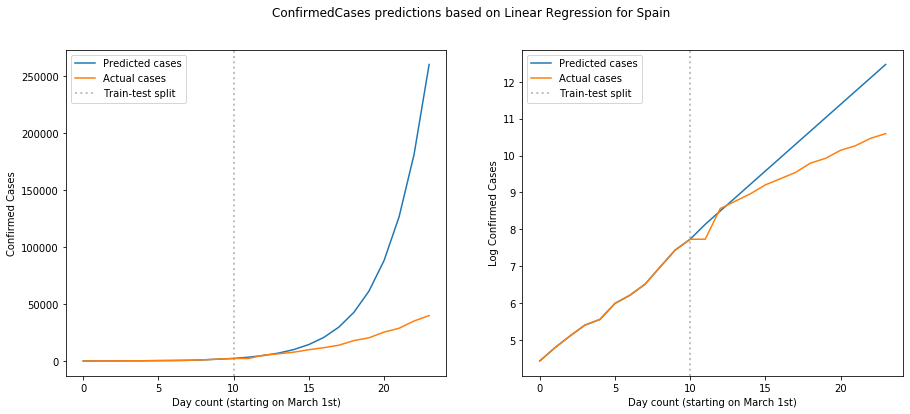

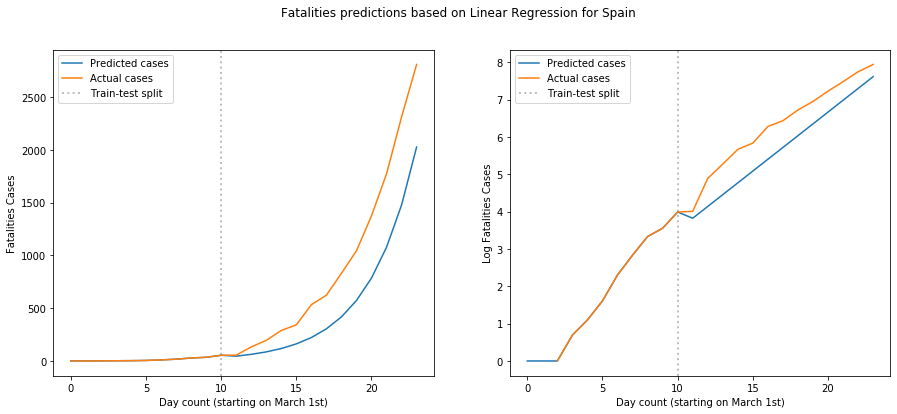

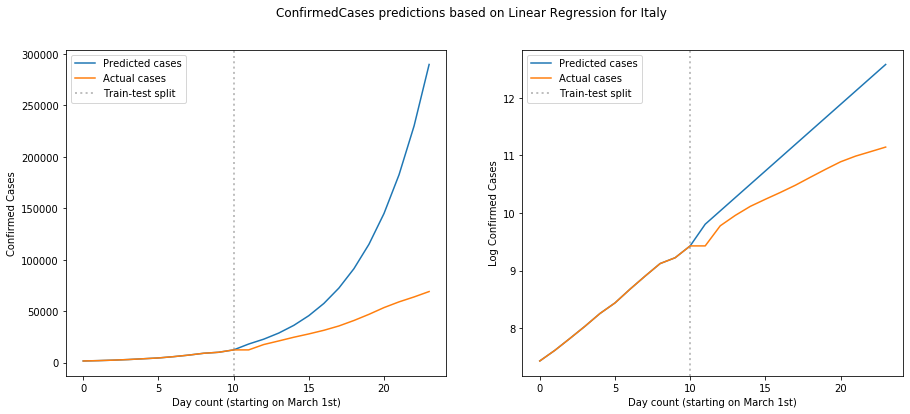

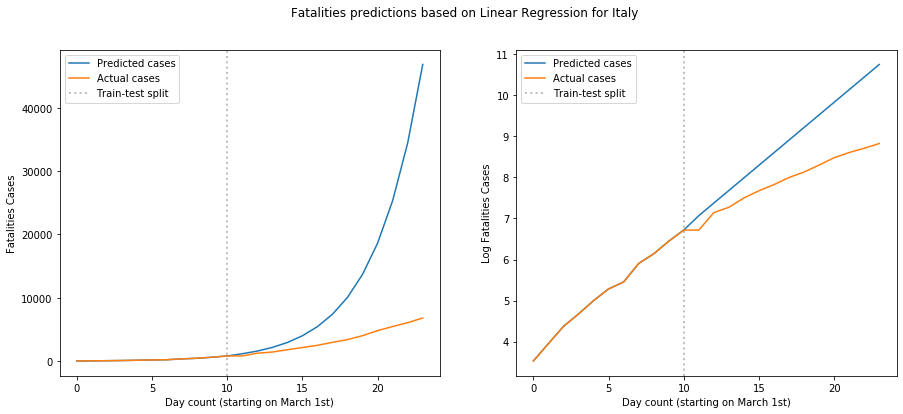

In [10]:
# Run the model for Spain
country_name = 'Spain'
day_start = 35 
lag_size = 30

data = lin_reg_with_lags_country(all_data, country_name, day_start, lag_size, country_dict)
plot_real_vs_prediction_country(data, train, country_name, 39, dates_list)
plot_real_vs_prediction_country_fatalities(data, train, country_name, 39, dates_list)

ts = time.time()

# Inputs
country_name = "Italy"
day_start = 35 
lag_size = 30

data = lin_reg_with_lags_country(all_data, country_name, day_start, lag_size, country_dict)
plot_real_vs_prediction_country(data, train, country_name, 39, dates_list)
plot_real_vs_prediction_country_fatalities(data, train, country_name, 39, dates_list)